# Boston house price prediction

## Importing libraries:

In [31]:
# Import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


## Boston dataset from sklearn

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()


In [4]:
data = pd.DataFrame(boston.data)

print(data)

           0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

## Notations (Those notations are copied from the source):

1- CRIM per capita crime rate by town
2- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3- INDUS proportion of non-retail business acres per town
4- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5- NOX nitric oxides concentration (parts per 10 million)
6- RM average number of rooms per dwelling
7- AGE proportion of owner-occupied units built prior to 1940
8- DIS weighted distances to five Boston employment centres
9- RAD index of accessibility to radial highways
10- TAX full-value property-tax rate per 10,000usd
11- PTRATIO pupil-teacher ratio by town
12- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13- LSTAT % lower status of the population

In [5]:
# now, we need to add what each column corresponds to:

data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# specifing our target

data["Price"] = boston.target


In [7]:
# Properties:

print(data.shape)

print(data.columns)

print(data.dtypes)

print(data.nunique())

print(data.isnull().sum())

print(data.describe())

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  5

In [8]:
# Creating correlation between the features


correlation = data.corr()

correlation.shape


(14, 14)


 This is the Heatmap: 



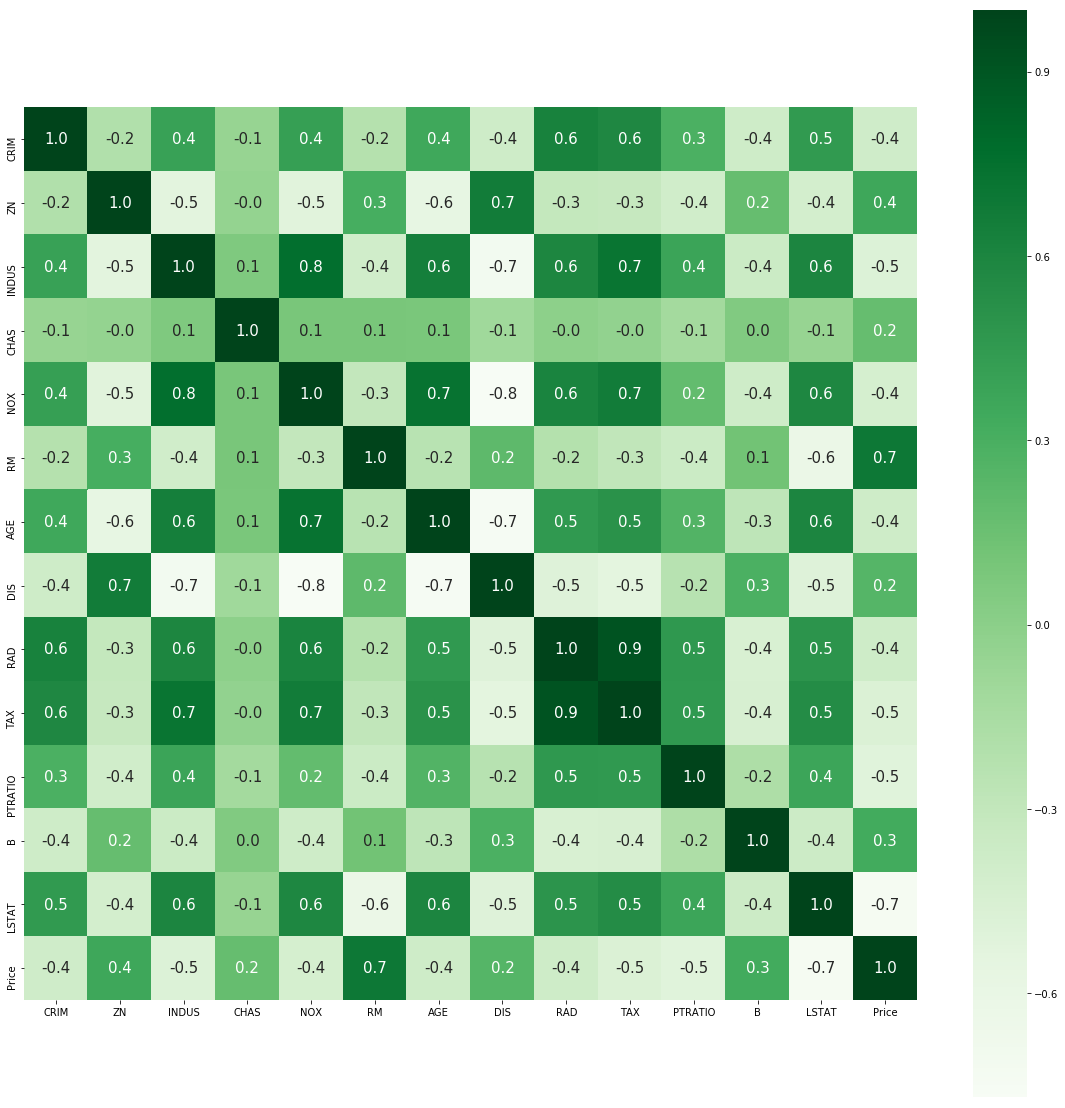

In [9]:
# Plotting heat map of the correlated features:

plt.figure(figsize = (20,20))
print("\n This is the Heatmap: \n")
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


In [10]:
# specifying target variable and independent variable:

X = data.drop(['Price'], axis = 1)
y = data['Price']

In [11]:
# specifying training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)


## Now, we are going to create the ML path, using Linear Regression and Random Forest Model:

## Linear Regression:

### Training data:    

In [12]:
# creating our model

model = LinearRegression()

# using the model on the training data

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# the intercept

model.intercept_

36.357041376595035

In [18]:
# coefficients:

coeff = pd.DataFrame([X_train.columns,model.coef_]).T
coeff = coeff.rename(columns ={0:"Attributes",1:"Coefficients"})

coeff

,Attributes,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


In [24]:
# Evaluating the Model

y_pred = model.predict(X_train)

pd.DataFrame(y_pred)

,0
0,24.522480
1,15.197510
2,25.577206
3,13.939400
4,39.466513
5,17.459599
6,39.710299
7,16.517481
8,20.197333
9,40.797755


### Metrics:

In [25]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711287
MSE: 19.073688703469028
RMSE: 4.367343437774161


### Plotting:

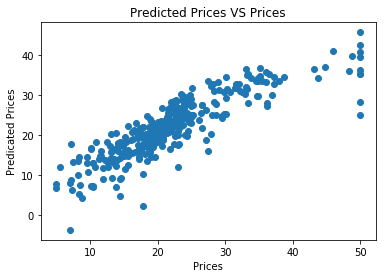

In [26]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicated Prices")
plt.title("Predicted Prices VS Prices")
plt.show()

### Testing for residuals:

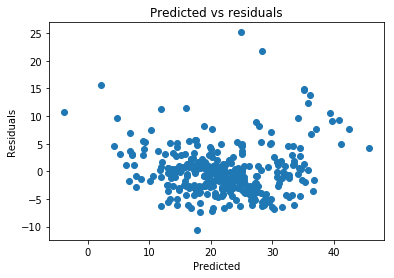

In [27]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### Now, we need to use test data to validate our LR model:

In [29]:
y_test_pred = model.predict(X_test)

In [30]:
# Evaluating our model

acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7120461624218655
Adjusted R^2: 0.6849200762732006
MAE: 3.867069394655806
MSE: 30.06816053374662
RMSE: 5.483444221814117


- The results are similar to the of the train data. As such, we are not over fitting or under fitting our model.

## Random Forest Model (RFM)

In [32]:
# initiating our RFM 

rfm = RandomForestRegressor()

# Training our data

rfm.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
# Evaluating our model

y_pred = rfm.predict(X_train)


In [34]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9729121848992065
Adjusted R^2: 0.9718764743218232
MAE: 0.8334180790960453
MSE: 2.038922316384181
RMSE: 1.4279083711443745


### Plotting:

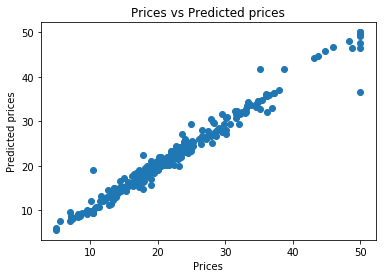

In [35]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

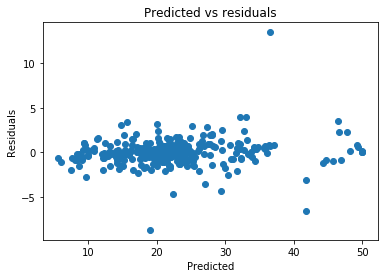

In [36]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### Testing our the validity of our model:

In [37]:
y_pred_test = rfm.predict(X_test)

In [38]:
# Model Evaluation

acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7120461624218655
Adjusted R^2: 0.6849200762732006
MAE: 3.867069394655806
MSE: 30.06816053374662
RMSE: 5.483444221814117
